## Анализируем правонарушения

### 1. Импортируем библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import datetime

### 2. Загружаем датафрейм, а также индекс делаем переменной вида дата/время

In [2]:
df = pd.read_csv('crime.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df.head()

,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
2010-07-01 00:10:00,VT-2010-00001,VT,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,22.0,22.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
2010-07-01 00:11:00,VT-2010-00004,VT,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
2010-07-01 00:35:00,VT-2010-00005,VT,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08
2010-07-01 00:44:00,VT-2010-00006,VT,Hardwick,Caledonia County,50005.0,64000 I 91 N; MM64 I 91 N,ROYALTON VSP,F,20.0,20.0,...,White,Vehicle Equipment,Equipment,False,No Search Conducted,NaN,False,Written Warning,False,-6.032327e+08
2010-07-01 01:10:00,VT-2010-00009,VT,Rochester,Windsor County,50027.0,36000 I 91 S; MM36 I 91 S,ROCKINGHAM VSP,M,24.0,24.0,...,Black,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,2.939526e+08


### 3. Построим сводную таблицу по количеству правонарушений

In [3]:
counts_df = pd.pivot_table(df, index=['driver_gender'], columns=['driver_race'], 
                        values='id', 
                        aggfunc='count')
counts_df

driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,1022,1339,579,75,96096
M,2424,4232,1983,188,165243


### 4. Построим сводную таблицу по процентам в зависимости от расы и пола внутри рассы

In [4]:
sex_df = pd.pivot_table(df, index=['driver_gender'], columns=['driver_race'], 
                        values='id',
                        aggfunc='count').transform(lambda x: x/x.sum(), axis=0)
sex_df

driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,0.296576,0.240352,0.225995,0.285171,0.367706
M,0.703424,0.759648,0.774005,0.714829,0.632294


### 5. Визуализируем результат предыдущей таблицы на столбцовом графике с высотой столбца 100 для каждой рассы и разделением внутри по полу

Text(0, 0.5, 'Percent is Arrested')

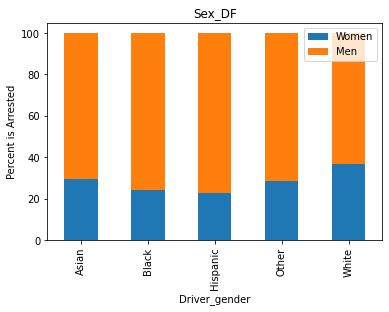

In [5]:
import plotly.express as px

sex_df.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)

plt.legend(('Women', 'Men'))
plt.title("Sex_DF")
plt.xlabel("Driver_gender")
plt.ylabel("Percent is Arrested")

### 6. Считаем количество правонарушений для каждого вида нарушений (violation)

In [12]:
df_vio = pd.pivot_table(df, index=['driver_gender'], columns=['violation'], 
                        values='id',
                        aggfunc='count',
                        fill_value=0)
df_vio

violation,DUI,Equipment,Moving violation,Other,Other (non-mapped)
driver_gender,,,,,
F,198,18755,76717,3441,0
M,513,31845,135383,6327,2


### 7. Проверяем зависимость между днями недели и количеством правонарушений

Text(0, 0.5, 'Counts')

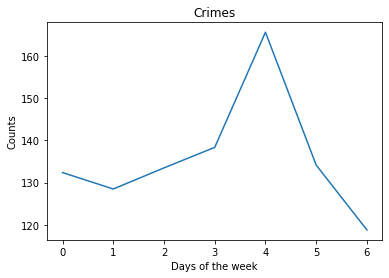

In [16]:
day_crime = df['id'].resample('D').count()
day_week_crime = day_crime.groupby(day_crime.index.dayofweek).mean()
day_week_crime.plot()

plt.title("Crimes")
plt.xlabel("Days of the week")
plt.ylabel("Counts")